In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/My Drive/Dataset
!ls

Mounted at /content/drive
/content/drive/My Drive/Dataset
 20191002-items.csv     data_stem2.csv		   model.png
 20191002-reviews.csv   data_stem3.csv		   New_York_cars.csv
'Air Quality.csv'       data_stem4.csv		   New_York_cars.gsheet
'archive (10).zip'      diabetes.csv		  'Revisian3 - Copy.docx'
 bestvalue	       'Heart Attack.csv'	   train.csv
 Car_Rates.csv	        heart.csv		   untitled_project
 customer_data.csv      Housing.csv
 data_stem1.csv        'Lazada (bisa yok).ipynb'


In [ ]:
import zipfile

def unzip(zip_file_path, extract_to):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Path ke file ZIP dan direktori tujuan ekstraksi
zip_file_path = "/content/drive/My Drive/Dataset/archive (10).zip"
extract_to_dir = "/tmp"

# Memanggil fungsi unzip untuk menginisialisasi proses ekstraksi
unzip(zip_file_path, extract_to_dir)


In [ ]:
import os

# Direktori tempat kamu mengekstraksi file ZIP
extracted_dir = "/tmp"  # Ganti dengan direktori yang sesuai

# List folder yang ada dalam direktori ekstraksi
subdirectories = os.listdir(extracted_dir)

# Cek setiap subfolder (seg_train, seg_test, seg_pred) dan lihat isinya
for subfolder in subdirectories:
    subfolder_path = os.path.join(extracted_dir, subfolder)
    if os.path.isdir(subfolder_path):
        print(f"Contents of '{subfolder}':")
        subfolder_contents = os.listdir(subfolder_path)
        for item in subfolder_contents:
            print(item)
        print("-" * 30)


Contents of 'seg_test':
seg_test
------------------------------
Contents of 'seg_pred':
seg_pred
------------------------------
Contents of 'seg_train':
seg_train
------------------------------
Contents of 'pyright-267-eyEg8hZT0Pzj':
------------------------------
Contents of 'initgoogle_syslog_dir.0':
unknown
------------------------------
Contents of 'python-languageserver-cancellation':
23bbe315edcf23317827e2a694f8c1a2f0ce0cda69
------------------------------
Contents of 'pyright-267-KotXPEoG1y47':
------------------------------


Showing images from 'seg_test':
  Showing images from 'seg_test':
    Showing images from 'sea':


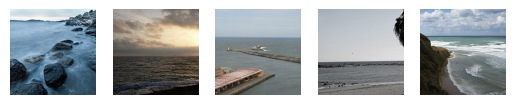

    Showing images from 'glacier':


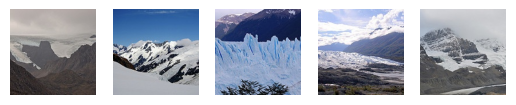

    Showing images from 'mountain':


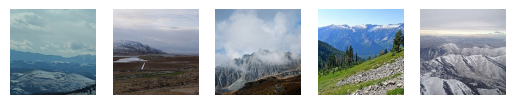

    Showing images from 'forest':


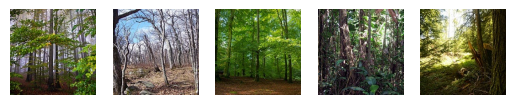

    Showing images from 'street':


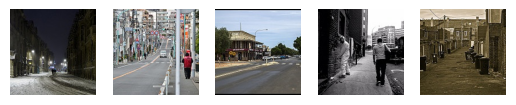

    Showing images from 'buildings':


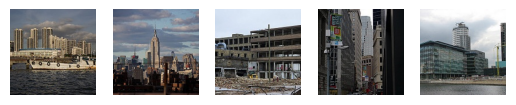

Showing images from 'seg_pred':
  Showing images from 'seg_pred':


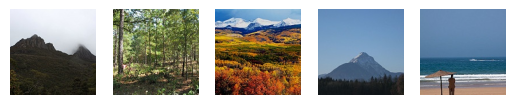

Showing images from 'seg_train':
  Showing images from 'seg_train':
    Showing images from 'sea':


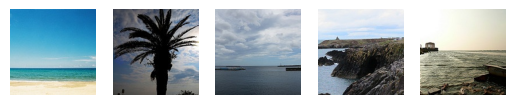

    Showing images from 'glacier':


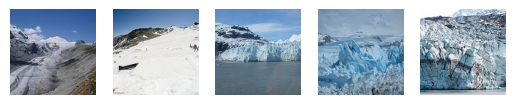

    Showing images from 'mountain':


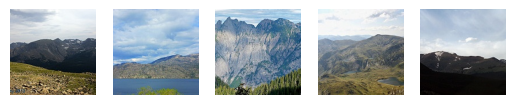

    Showing images from 'forest':


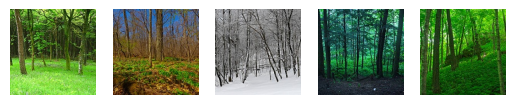

    Showing images from 'street':


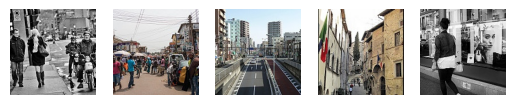

    Showing images from 'buildings':


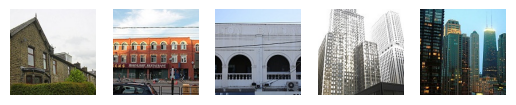

Showing images from 'pyright-267-eyEg8hZT0Pzj':
Showing images from 'initgoogle_syslog_dir.0':
Showing images from 'python-languageserver-cancellation':
  Showing images from '23bbe315edcf23317827e2a694f8c1a2f0ce0cda69':
Showing images from 'pyright-267-KotXPEoG1y47':


In [ ]:
import os
import matplotlib.pyplot as plt
from matplotlib import image

# Direktori tempat kamu mengekstraksi file ZIP
extracted_dir = "/tmp"  # Ganti dengan direktori yang sesuai

# Fungsi rekursif untuk menampilkan gambar dari semua subfolder
def show_images_recursively(folder_path, depth=0, max_depth=3):
    if depth > max_depth:
        return

    subfolders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]
    for subfolder in subfolders:
        subfolder_path = os.path.join(folder_path, subfolder)
        print("  " * depth + f"Showing images from '{subfolder}':")
        image_files = [f for f in os.listdir(subfolder_path) if f.endswith(".jpg")]
        num_images = min(len(image_files), 5)  # Menampilkan maksimal 3 gambar per folder
        for i in range(num_images):
            img_path = os.path.join(subfolder_path, image_files[i])
            img = image.imread(img_path)
            plt.subplot(1, num_images, i+1)
            plt.imshow(img)
            plt.axis("off")
        plt.show()

        show_images_recursively(subfolder_path, depth + 1, max_depth)

# Menampilkan gambar dari subfolder secara rekursif
show_images_recursively(extracted_dir)


In [ ]:
train_dir = os.path.join(extracted_dir, 'seg_train/seg_train')
val_dir = os.path.join(extracted_dir, 'seg_test/seg_test')
pred_dir = os.path.join(extracted_dir, 'seg_pred/seg_pred')

In [ ]:
train_forest_dir = os.path.join(train_dir, 'forest')
validation_forest_dir = os.path.join(val_dir, 'forest')

train_glacier_dir = os.path.join(train_dir, 'glacier')
validation_glacier_dir = os.path.join(val_dir, 'glacier')

train_street_dir = os.path.join(train_dir, 'street')
validation_street_dir = os.path.join(val_dir, 'street')

train_buildings_dir = os.path.join(train_dir, 'buildings')
validation_buildings_dir = os.path.join(val_dir, 'buildings')

train_mountain_dir = os.path.join(train_dir, 'mountain')
validation_mountain_dir = os.path.join(val_dir, 'mountain')

train_sea_dir = os.path.join(train_dir, 'sea')
validation_sea_dir = os.path.join(val_dir, 'sea')

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.models as Models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import cv2

# **Test (tanpa image augmentation)**

In [ ]:
IMAGE_SIZE = (150, 150)

BATCH_SIZE = 32

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=IMAGE_SIZE,
  batch_size=BATCH_SIZE)

Found 14034 files belonging to 6 classes.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  val_dir,
  seed=123,
  image_size=IMAGE_SIZE,
  batch_size=BATCH_SIZE)

Found 3000 files belonging to 6 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


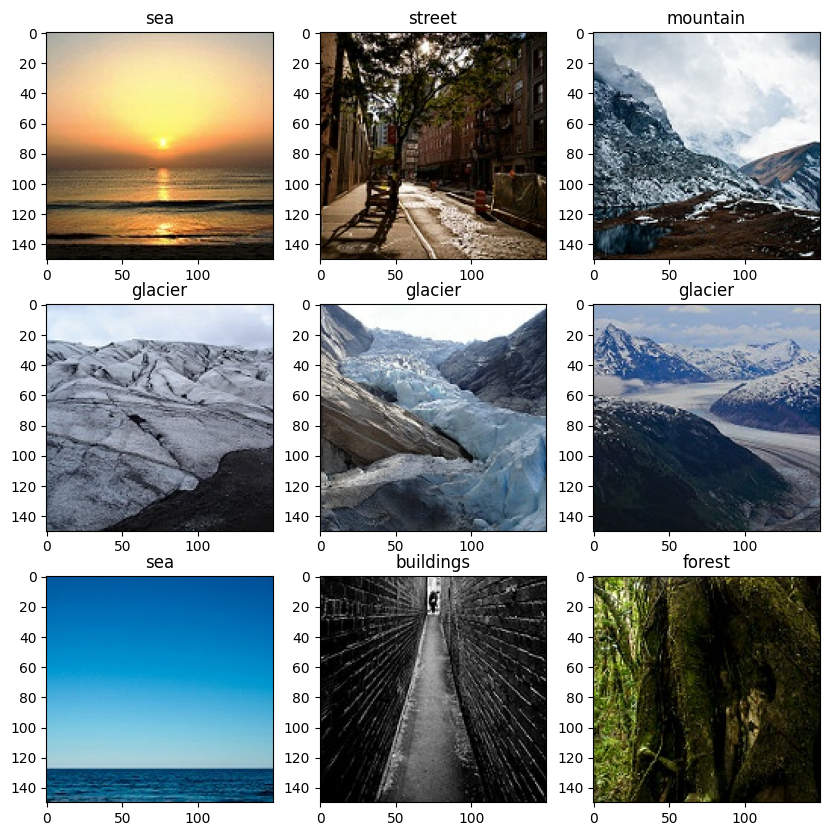

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        # plt.axis("off")

In [ ]:
num_classes = len(class_names)

In [ ]:
model = Models.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150,150,3)))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
# SETUP A EARLY STOPPING CALL and model check point API
earlystopping = EarlyStopping(monitor='val_loss',
                                              patience=5,
                                              verbose=1,
                                              mode='min'
                                              )
checkpointer = ModelCheckpoint(filepath='bestvalue', verbose=0, save_best_only=True)
callback_list = [checkpointer, earlystopping]

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=35,
    callbacks=callback_list
)

Epoch 1/35


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


439/439 [==============================] - ETA: 0s - loss: 1.2845 - accuracy: 0.4943

439/439 [==============================] - 37s 46ms/step - loss: 1.2845 - accuracy: 0.4943 - val_loss: 0.9374 - val_accuracy: 0.6493
Epoch 2/35
438/439 [============================>.] - ETA: 0s - loss: 0.9211 - accuracy: 0.6495

439/439 [==============================] - 19s 42ms/step - loss: 0.9218 - accuracy: 0.6494 - val_loss: 0.7784 - val_accuracy: 0.7083
Epoch 3/35
438/439 [============================>.] - ETA: 0s - loss: 0.7842 - accuracy: 0.7098

439/439 [==============================] - 17s 38ms/step - loss: 0.7844 - accuracy: 0.7096 - val_loss: 0.6771 - val_accuracy: 0.7477
Epoch 4/35
439/439 [==============================] - 14s 30ms/step - loss: 0.7135 - accuracy: 0.7365 - val_loss: 0.9130 - val_accuracy: 0.6513
Epoch 5/35
436/439 [============================>.] - ETA: 0s - loss: 0.6577 - accuracy: 0.7610

439/439 [==============================] - 16s 36ms/step - loss: 0.6576 - accuracy: 0.7611 - val_loss: 0.6418 - val_accuracy: 0.7680
Epoch 6/35
439/439 [==============================] - 16s 35ms/step - loss: 0.6002 - accuracy: 0.7858 - val_loss: 0.7210 - val_accuracy: 0.7467
Epoch 7/35
439/439 [==============================] - ETA: 0s - loss: 0.5566 - accuracy: 0.8004

439/439 [==============================] - 16s 35ms/step - loss: 0.5566 - accuracy: 0.8004 - val_loss: 0.6313 - val_accuracy: 0.7830
Epoch 8/35
436/439 [============================>.] - ETA: 0s - loss: 0.5323 - accuracy: 0.8084

439/439 [==============================] - 17s 39ms/step - loss: 0.5324 - accuracy: 0.8084 - val_loss: 0.5953 - val_accuracy: 0.7990
Epoch 9/35
439/439 [==============================] - 14s 32ms/step - loss: 0.5033 - accuracy: 0.8194 - val_loss: 0.6350 - val_accuracy: 0.7850
Epoch 10/35
439/439 [==============================] - 14s 32ms/step - loss: 0.4784 - accuracy: 0.8298 - val_loss: 0.6573 - val_accuracy: 0.7847
Epoch 11/35
439/439 [==============================] - 16s 36ms/step - loss: 0.4576 - accuracy: 0.8359 - val_loss: 0.6161 - val_accuracy: 0.7963
Epoch 12/35
439/439 [==============================] - 15s 34ms/step - loss: 0.4165 - accuracy: 0.8459 - val_loss: 0.6611 - val_accuracy: 0.7827
Epoch 13/35
439/439 [==============================] - 14s 32ms/step - loss: 0.4085 - accuracy: 0.8527 - val_loss: 0.6082 - val_accuracy: 0.8067
Epoch 13: early stopping


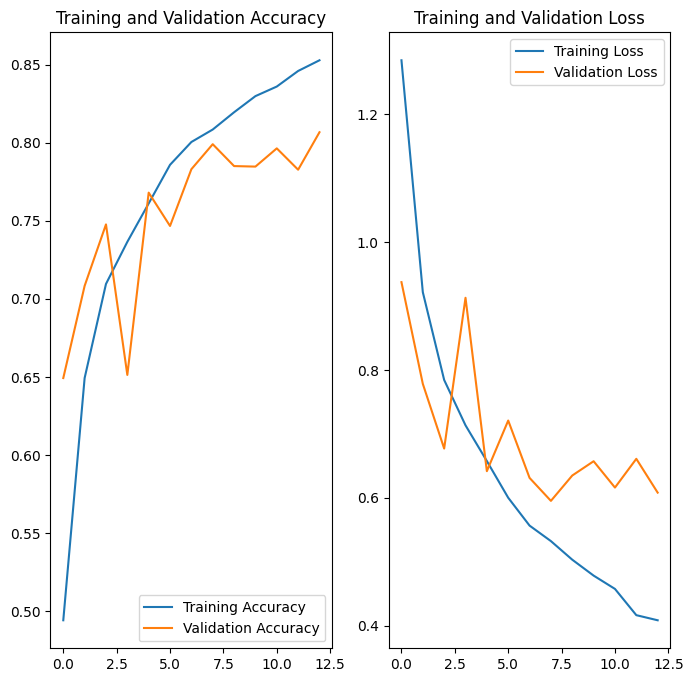

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(13)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **Image Augmentation**

In [ ]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      width_shift_range=0.15,
      height_shift_range=0.15,
      shear_range=0.2,
      zoom_range=0.5,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=IMAGE_SIZE,
                                                     class_mode='categorical')

Found 14034 images belonging to 6 classes.


In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=val_dir,
                                                 target_size=IMAGE_SIZE,
                                                 class_mode='categorical')

Found 3000 images belonging to 6 classes.


In [ ]:
# Dapatkan kamus yang memetakan antara indeks kelas dan nama kelas
class_mapping = train_data_gen.class_indices

# Tampilkan nama-nama kelas
class_name = list(class_mapping.keys())
print("Class names:", class_name)

Class names: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

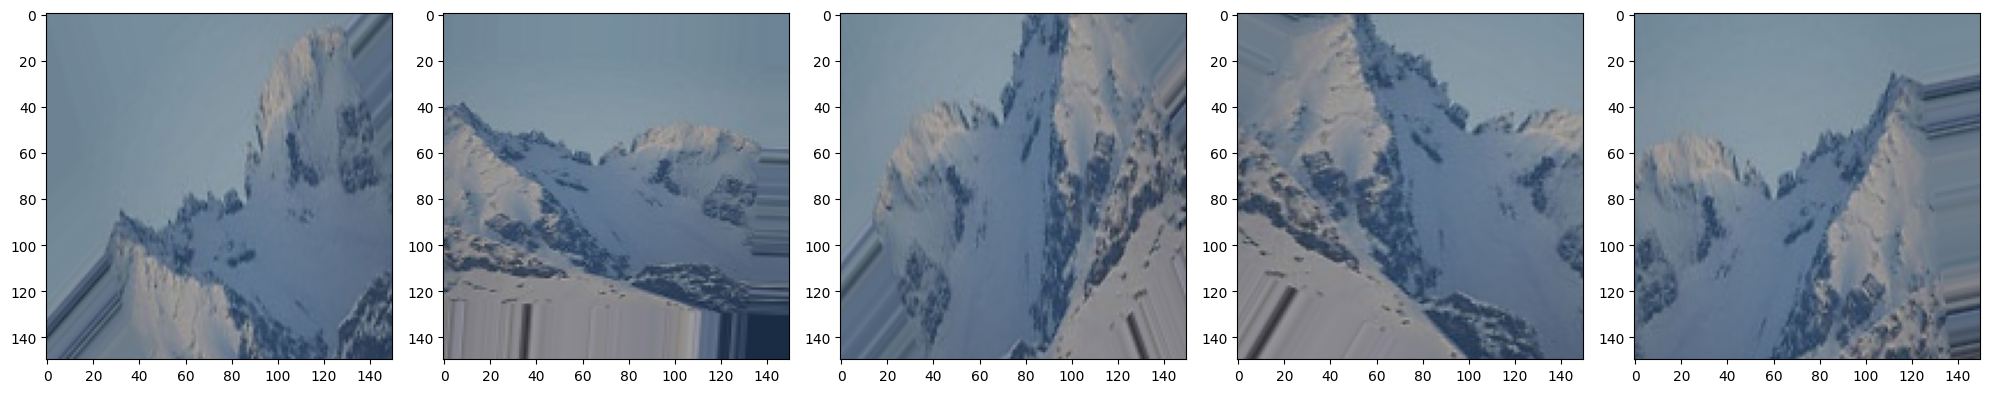

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
model = Models.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150,150,3)))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.CategoricalCrossentropy(),
  metrics=['accuracy'])

In [ ]:
# SETUP A EARLY STOPPING CALL and model check point API
earlystopping = EarlyStopping(monitor='val_loss',
                                              patience=5,
                                              verbose=1,
                                              mode='min'
                                              )
checkpointer = ModelCheckpoint(filepath='bestvalue', verbose=0, save_best_only=True)
callback_list = [checkpointer, earlystopping]

In [ ]:
history = model.fit(
    train_data_gen,
    validation_data=val_data_gen,
    epochs=35,
    callbacks=callback_list
)

Epoch 1/35
439/439 [==============================] - ETA: 0s - loss: 1.3429 - accuracy: 0.4361

439/439 [==============================] - 108s 232ms/step - loss: 1.3429 - accuracy: 0.4361 - val_loss: 1.1982 - val_accuracy: 0.5457
Epoch 2/35
439/439 [==============================] - ETA: 0s - loss: 1.1357 - accuracy: 0.5486

439/439 [==============================] - 104s 237ms/step - loss: 1.1357 - accuracy: 0.5486 - val_loss: 1.0321 - val_accuracy: 0.6013
Epoch 3/35
439/439 [==============================] - ETA: 0s - loss: 1.0527 - accuracy: 0.5940

439/439 [==============================] - 102s 232ms/step - loss: 1.0527 - accuracy: 0.5940 - val_loss: 0.8887 - val_accuracy: 0.6893
Epoch 4/35
439/439 [==============================] - 102s 232ms/step - loss: 0.9801 - accuracy: 0.6340 - val_loss: 0.9376 - val_accuracy: 0.6520
Epoch 5/35
439/439 [==============================] - ETA: 0s - loss: 0.9305 - accuracy: 0.6560

439/439 [==============================] - 102s 232ms/step - loss: 0.9305 - accuracy: 0.6560 - val_loss: 0.7717 - val_accuracy: 0.7260
Epoch 6/35
439/439 [==============================] - 102s 232ms/step - loss: 0.8858 - accuracy: 0.6738 - val_loss: 0.8152 - val_accuracy: 0.7053
Epoch 7/35
439/439 [==============================] - ETA: 0s - loss: 0.8704 - accuracy: 0.6818

439/439 [==============================] - 102s 232ms/step - loss: 0.8704 - accuracy: 0.6818 - val_loss: 0.7557 - val_accuracy: 0.7210
Epoch 8/35
439/439 [==============================] - ETA: 0s - loss: 0.8392 - accuracy: 0.6937

439/439 [==============================] - 105s 240ms/step - loss: 0.8392 - accuracy: 0.6937 - val_loss: 0.6895 - val_accuracy: 0.7667
Epoch 9/35
439/439 [==============================] - ETA: 0s - loss: 0.8198 - accuracy: 0.7019

439/439 [==============================] - 101s 230ms/step - loss: 0.8198 - accuracy: 0.7019 - val_loss: 0.6750 - val_accuracy: 0.7647
Epoch 10/35
439/439 [==============================] - ETA: 0s - loss: 0.7934 - accuracy: 0.7153

439/439 [==============================] - 103s 235ms/step - loss: 0.7934 - accuracy: 0.7153 - val_loss: 0.6518 - val_accuracy: 0.7673
Epoch 11/35
439/439 [==============================] - 99s 226ms/step - loss: 0.7900 - accuracy: 0.7089 - val_loss: 0.6623 - val_accuracy: 0.7673
Epoch 12/35
439/439 [==============================] - 101s 230ms/step - loss: 0.7620 - accuracy: 0.7216 - val_loss: 0.6664 - val_accuracy: 0.7607
Epoch 13/35
439/439 [==============================] - ETA: 0s - loss: 0.7646 - accuracy: 0.7209

439/439 [==============================] - 104s 236ms/step - loss: 0.7646 - accuracy: 0.7209 - val_loss: 0.6131 - val_accuracy: 0.7787
Epoch 14/35
439/439 [==============================] - 100s 228ms/step - loss: 0.7287 - accuracy: 0.7396 - val_loss: 0.6526 - val_accuracy: 0.7740
Epoch 15/35
439/439 [==============================] - ETA: 0s - loss: 0.7348 - accuracy: 0.7336

439/439 [==============================] - 106s 243ms/step - loss: 0.7348 - accuracy: 0.7336 - val_loss: 0.5834 - val_accuracy: 0.7920
Epoch 16/35
439/439 [==============================] - 100s 229ms/step - loss: 0.7194 - accuracy: 0.7389 - val_loss: 0.6393 - val_accuracy: 0.7717
Epoch 17/35
439/439 [==============================] - 102s 233ms/step - loss: 0.6959 - accuracy: 0.7476 - val_loss: 0.5992 - val_accuracy: 0.7967
Epoch 18/35
439/439 [==============================] - 100s 227ms/step - loss: 0.6902 - accuracy: 0.7488 - val_loss: 0.5858 - val_accuracy: 0.7970
Epoch 19/35
439/439 [==============================] - ETA: 0s - loss: 0.7005 - accuracy: 0.7430

439/439 [==============================] - 104s 237ms/step - loss: 0.7005 - accuracy: 0.7430 - val_loss: 0.5646 - val_accuracy: 0.8103
Epoch 20/35
439/439 [==============================] - ETA: 0s - loss: 0.6740 - accuracy: 0.7563

439/439 [==============================] - 102s 233ms/step - loss: 0.6740 - accuracy: 0.7563 - val_loss: 0.5429 - val_accuracy: 0.8130
Epoch 21/35
439/439 [==============================] - 107s 243ms/step - loss: 0.6708 - accuracy: 0.7543 - val_loss: 0.5506 - val_accuracy: 0.8087
Epoch 22/35
439/439 [==============================] - 99s 226ms/step - loss: 0.6627 - accuracy: 0.7596 - val_loss: 0.6026 - val_accuracy: 0.7940
Epoch 23/35
439/439 [==============================] - 99s 226ms/step - loss: 0.6598 - accuracy: 0.7589 - val_loss: 0.6167 - val_accuracy: 0.7907
Epoch 24/35
439/439 [==============================] - 102s 232ms/step - loss: 0.6617 - accuracy: 0.7653 - val_loss: 0.6266 - val_accuracy: 0.7817
Epoch 25/35
439/439 [==============================] - ETA: 0s - loss: 0.6503 - accuracy: 0.7615

439/439 [==============================] - 101s 231ms/step - loss: 0.6503 - accuracy: 0.7615 - val_loss: 0.5355 - val_accuracy: 0.8110
Epoch 26/35
439/439 [==============================] - 101s 231ms/step - loss: 0.6362 - accuracy: 0.7700 - val_loss: 0.5873 - val_accuracy: 0.7953
Epoch 27/35
439/439 [==============================] - ETA: 0s - loss: 0.6470 - accuracy: 0.7684

439/439 [==============================] - 102s 233ms/step - loss: 0.6470 - accuracy: 0.7684 - val_loss: 0.5209 - val_accuracy: 0.8100
Epoch 28/35
439/439 [==============================] - 102s 232ms/step - loss: 0.6262 - accuracy: 0.7739 - val_loss: 0.5557 - val_accuracy: 0.8063
Epoch 29/35
439/439 [==============================] - 100s 228ms/step - loss: 0.6318 - accuracy: 0.7745 - val_loss: 0.5254 - val_accuracy: 0.8127
Epoch 30/35
439/439 [==============================] - 102s 233ms/step - loss: 0.6299 - accuracy: 0.7739 - val_loss: 0.5343 - val_accuracy: 0.8147
Epoch 31/35
439/439 [==============================] - 100s 229ms/step - loss: 0.6188 - accuracy: 0.7786 - val_loss: 0.5431 - val_accuracy: 0.8090
Epoch 32/35
439/439 [==============================] - 99s 225ms/step - loss: 0.6251 - accuracy: 0.7729 - val_loss: 0.5546 - val_accuracy: 0.8200
Epoch 32: early stopping


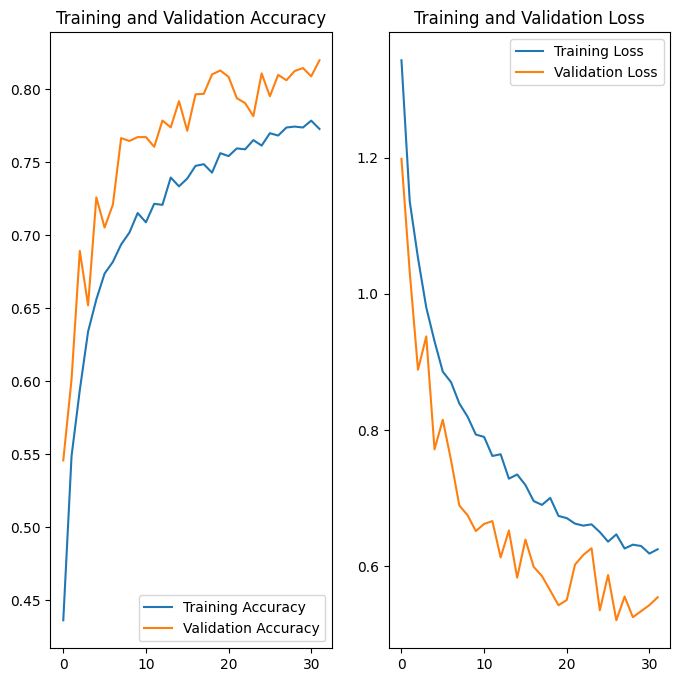

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(32)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Save model
model.save("/content/drive/My Drive/model_img.h5")

In [ ]:
from tensorflow.keras.models import load_model

# Muat model dari file
loaded_model = load_model("/content/drive/My Drive/model_img.h5")

OSError: ignored

In [ ]:
len(os.listdir(pred_dir))

7301

# **Predict**

In [ ]:
# Dapatkan kamus yang memetakan antara indeks kelas dan nama kelas
class_mapping = train_data_gen.class_indices

# Tampilkan nama-nama kelas
class_name = list(class_mapping.keys())
print("Class names:", class_name)

Class names: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


1/1 [==============================] - 0s 127ms/step


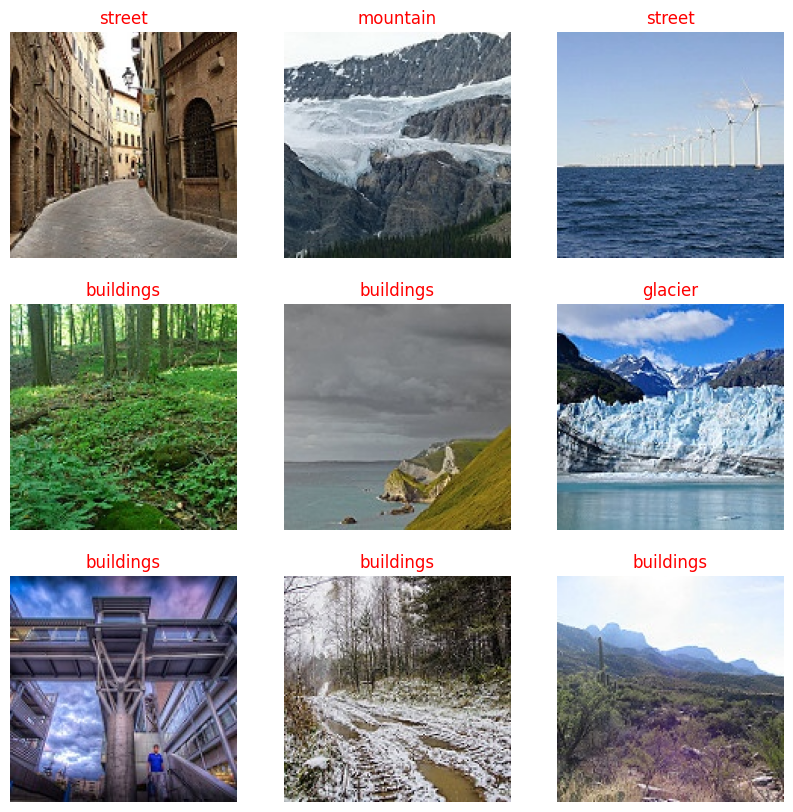

In [ ]:
from PIL import Image
import numpy as np
import random

# List gambar yang ada dalam direktori pred_dir
image_files = [f for f in os.listdir(pred_dir) if f.endswith(".jpg")]
plt.figure(figsize=(10, 10))

# Acak urutan gambar
random.shuffle(image_files)

# Menampilkan beberapa contoh gambar dengan prediksi
num_images_to_show = min(len(image_files), 9)


for i in range(num_images_to_show):
    img_filename = image_files[i]
    img_path = os.path.join(pred_dir, img_filename)
    img = Image.open(img_path)

    # Lakukan prediksi pada gambar
    img_array = np.array(img.resize(IMAGE_SIZE))
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch
    prediction = loaded_model.predict(img_array)
    predicted_class = np.argmax(prediction)
    label = class_names[predicted_class]

    # Tampilkan gambar
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(label, color="red")
    plt.axis("off")

plt.show()
